# Credit Card Fraud Detection

In [1]:
# importing basic required liberary for data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Roadmap

- Data Load
- EDA
- Feature Engineering
- Train-Test Split
- Different Model Building with imbalance class and Hyperparameter tuning
- Different Model Building with balance class and Hyperparameter tuning
- Different Model Evaluation
- Building best Model on basis Model Evaluation matrix
- Check the Evaluation matrix
- Finding the best feature
- Conclusion


In [2]:
# load the data
credit_data = pd.read_csv("creditcard.csv")
# lets check the head part
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Lets Check the null value ib data set
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- No null values present in this data set

In [4]:
# Lets see the stattics part of the dataset
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# shape of the data
credit_data.shape

(284807, 31)

- There 284807 rows and 31 columns in this dataset.

In [6]:
#observe the different feature type present in the data
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

- All the feature present in this dataset are float except Class feature.

In [7]:
# lets see the Traget feature

print("Count for Normal and Fraud Transcation:")
credit_data["Class"].value_counts()

Count for Normal and Fraud Transcation:


0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Count')

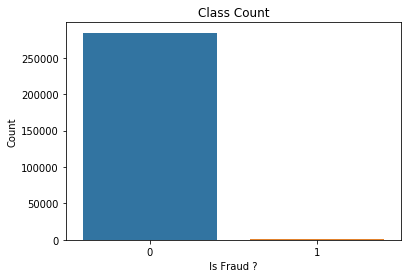

In [8]:
#lets check the target variable
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

sns.countplot(x="Class", data = credit_data)
plt.title("Class Count")
plt.xlabel(" Is Fraud ? ")
plt.ylabel("Count")

- The Class target feature is higly imbalanced

In [9]:
# target feature

classes=credit_data['Class'].value_counts()
normal_share=classes[0]/credit_data['Class'].count()*100
fraud_share=classes[1]/credit_data['Class'].count()*100

In [10]:
# percentage of fraud and normal 
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


# Time Column- let see how this columns is behaving with respect to Target variable ?

In [11]:
# lets change the time feature to min and hour
time = pd.to_timedelta(credit_data["Time"], unit="s")
credit_data["time_min"] = (time.dt.components.minutes).astype(int)
credit_data["time_hour"] = (time.dt.components.hours).astype(int)

Text(0.5, 1.0, 'Distribution of classes with time in hourly wise')

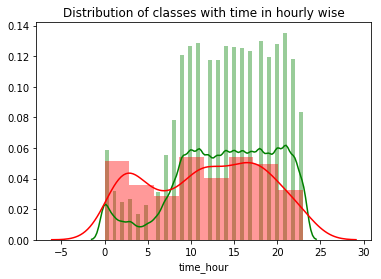

In [12]:
# Create a scatter plot to observe the distribution of classes with time

sns.distplot(credit_data[credit_data["Class"]==0]["time_hour"],color='g')
sns.distplot(credit_data[credit_data["Class"]==1]["time_hour"],color='r')
plt.title("Distribution of classes with time in hourly wise")

Text(0.5, 1.0, 'Distribution of classes with time in min. wise')

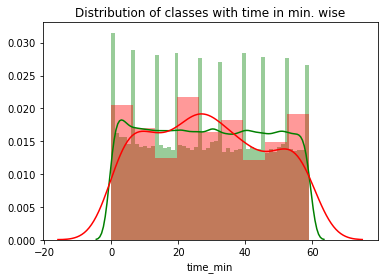

In [13]:
# Create a scatter plot to observe the distribution of classes with time

sns.distplot(credit_data[credit_data["Class"]==0]["time_min"],color='g')
sns.distplot(credit_data[credit_data["Class"]==1]["time_min"],color='r')
plt.title("Distribution of classes with time in min. wise")

- We can not see any clear pattern for Fraud and Normal transaction 

In [14]:
# Create a scatter plot to observe the distribution of classes with Amount
#Looking the statistics of our Amount class frauds and normal transactions

fraud = credit_data[credit_data["Class"]==1]
normal = credit_data[credit_data["Class"]==0]


In [15]:
# lets check stats part for amount with respect to fraud and Normal transaction
print(fraud.Amount.describe())

print()

print(normal.Amount.describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


- We can see here that fraud transaction has more mean amount than normal transaction.

In [16]:
# Lets transform the Amount feature to log
credit_data["Amount_log"] = np.log(credit_data["Amount"]+0.01)

Text(0, 0.5, 'Amount in Log')

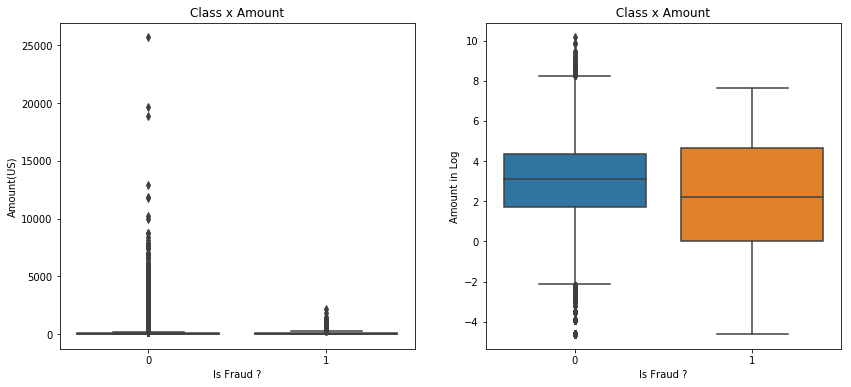

In [17]:
# box plot of Amount and Amount_log
plt.figure(figsize=(14,6))

plt.subplot(121)

ax = sns.boxplot(x="Class",y="Amount",data = credit_data)
ax.set_title("Class x Amount")
ax.set_xlabel("Is Fraud ?")
ax.set_ylabel("Amount(US)")

plt.subplot(122)

ax1 = sns.boxplot(x="Class", y="Amount_log", data=credit_data)
ax1.set_title(" Class x Amount ")
ax1.set_xlabel("Is Fraud ?")
ax1.set_ylabel("Amount in Log")

- Minor difference in fraud and NormalLog_amount. IQR for fraud transactions is more than normal transactions.

Text(0.5, 1.0, 'AMounts by Minutes of Frauds and Normal Transactions')

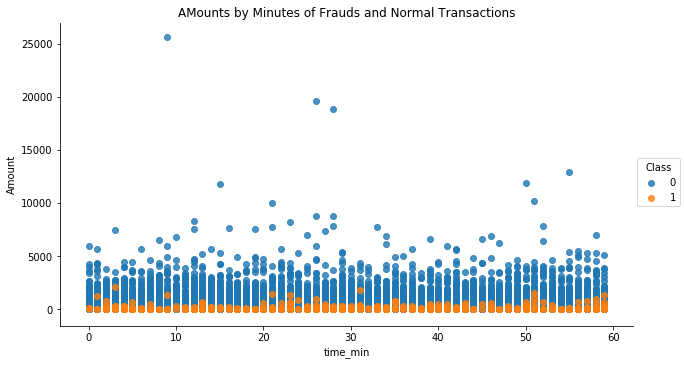

In [18]:
#scatter plot of the Time_min distribuition by Amount

ax = sns.lmplot(y="Amount",x="time_min",fit_reg= False, aspect=1.8,data=credit_data,hue="Class")
plt.title("Amounts by Minutes of Frauds and Normal Transactions")

Text(0.5, 1.0, 'AMounts by Hours of Frauds and Normal Transactions')

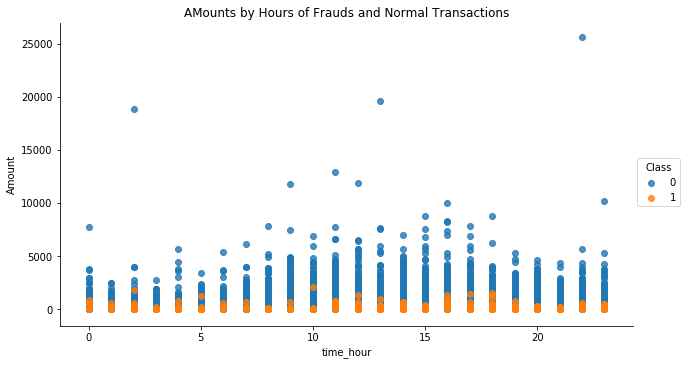

In [19]:
#Looking a scatter plot of the Time_hour distribuition by Amount
ax = sns.lmplot(y="Amount",x="time_hour",fit_reg= False, aspect=1.8,data=credit_data,hue="Class")
plt.title("Amounts by Hours of Frauds and Normal Transactions")

- No pattern I can see here time based

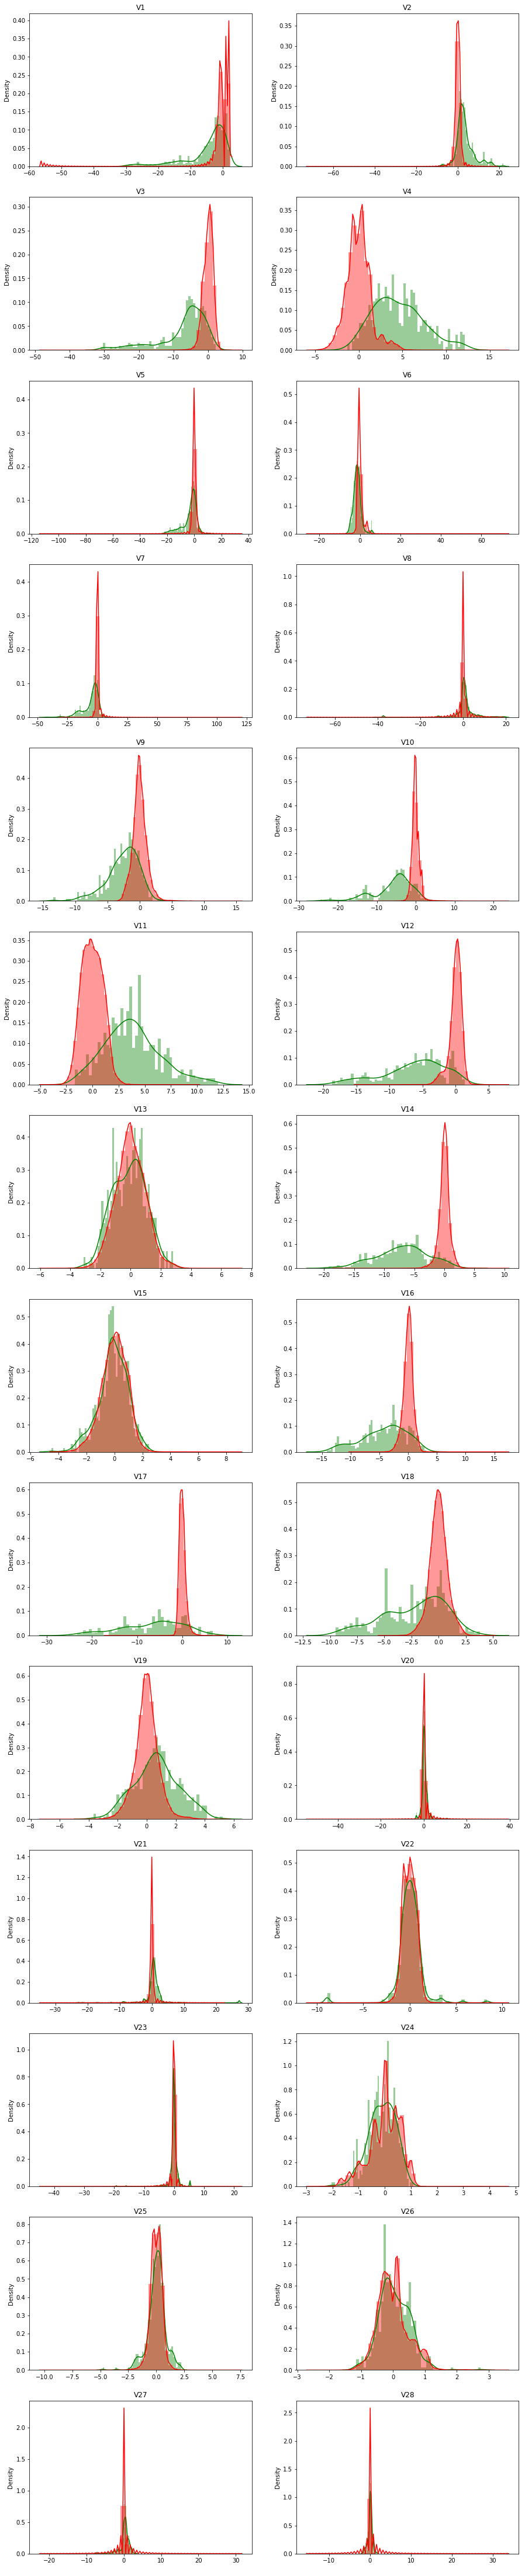

In [20]:
#We are searching for features that diverges from normal distribuition

columns = credit_data.iloc[:,1:29].columns
#columns

fraud= credit_data["Class"]==1
normal= credit_data["Class"]==0

import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(14,2)
plt.figure(figsize=(15,20*4))


for n , col in enumerate(credit_data[columns]):
    
    ax = plt.subplot(grid[n])
    sns.distplot(credit_data[col][fraud], bins=50, color='g')
    sns.distplot(credit_data[col][normal], bins=50, color='r')
    ax.set_ylabel("Density")
    ax.set_title(str(col))
    ax.set_xlabel(" ")

In [21]:
# Feature selections - I will select the variables where fraud class have a interesting behavior and might can help us predict

df = credit_data[["time_hour","time_min","V2","V3","V4","V9","V10","V11","V12","V14","V16","V17","V18","V19","V27","Amount","Class"]]

In [22]:
# Now we have taken all the important feature which help to predict the fraud.
df.head()

,time_hour,time_min,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19,V27,Amount,Class
0,0,0,-0.072781,2.536347,1.378155,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.133558,149.62,0
1,0,0,0.266151,0.166480,0.448154,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.008983,2.69,0
2,0,0,-1.340163,1.773209,0.379780,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,-0.055353,378.66,0
3,0,0,-0.185226,1.792993,-0.863291,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,0.062723,123.50,0
4,0,0,0.877737,1.548718,0.403034,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.219422,69.99,0


In [23]:
# chnaged amount in log
df.Amount = np.log(df.Amount + 0.001)

In [24]:
# head part of the data which we seleted for model
df.head()

,time_hour,time_min,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19,V27,Amount,Class
0,0,0,-0.072781,2.536347,1.378155,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.133558,5.008105,0
1,0,0,0.266151,0.166480,0.448154,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.008983,0.989913,0
2,0,0,-1.340163,1.773209,0.379780,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,-0.055353,5.936641,0
3,0,0,-0.185226,1.792993,-0.863291,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,0.062723,4.816249,0
4,0,0,0.877737,1.548718,0.403034,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.219422,4.248367,0


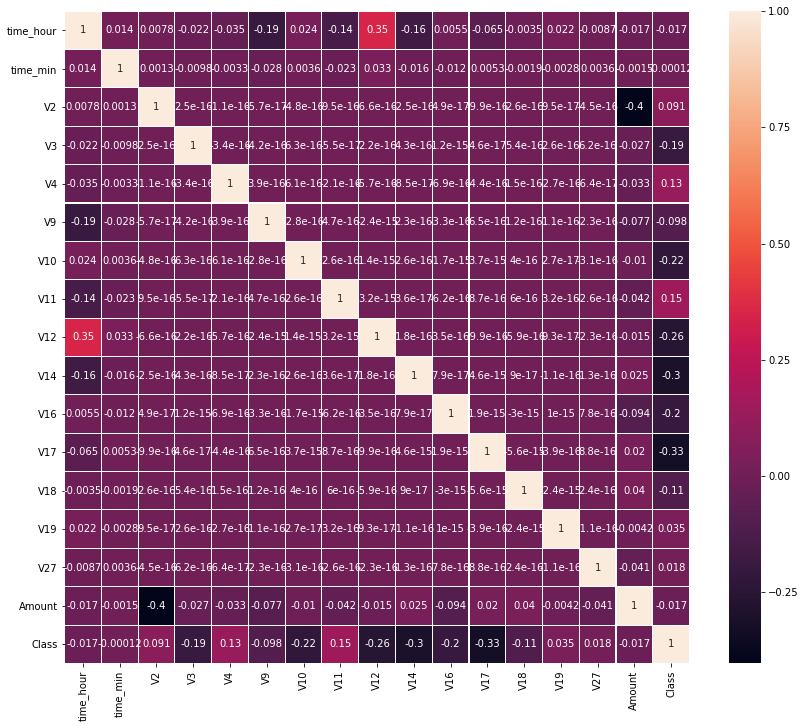

In [25]:
# lets see the multicollinearity using heat map
plt.figure(figsize=(14,12))

sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, linecolor="white",annot=True)

- As data is aleady in PCA formed and also multicollinearity is very less expected in PCA.

# Preprocessing Step - 
    - Skewness
    - Train and test Split

In [26]:
# Lets check the skewness of all feature
for col in df.columns:
    print(col)
    print(df[col].skew())

time_hour
-0.4904701602042523
time_min
0.02301775797763109
V2
-4.624865573285336
V3
-2.240155440240421
V4
0.676292097985747
V9
0.5546797719063509
V10
1.1871405899625276
V11
0.35650585548882024
V12
-2.2784009354106174
V14
-1.9951758402683304
V16
-1.100966276051066
V17
-3.844914473870619
V18
-0.25988026809430603
V19
0.10919175998147107
V27
-1.170208942432713
Amount
-0.8344851061344757
Class
23.99757931064749


- We can see some features are higher skewness and lets try to treat them now using PowerTransformer

In [27]:
#Below are feature are required to remove the skewness
columns = ['V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18',
       'V19']

# Before applying the PowerTransformer let see the skewness
for col in columns:
    print(col)
    print(df[col].skew())

V2
-4.624865573285336
V3
-2.240155440240421
V4
0.676292097985747
V9
0.5546797719063509
V10
1.1871405899625276
V11
0.35650585548882024
V12
-2.2784009354106174
V14
-1.9951758402683304
V16
-1.100966276051066
V17
-3.844914473870619
V18
-0.25988026809430603
V19
0.10919175998147107


In [28]:
#preprocessing.PowerTransformer to fit & transform dataset

from sklearn.preprocessing import PowerTransformer
transform = PowerTransformer(copy=False)
df[columns] = transform.fit_transform(df[columns])

In [29]:
# lets check the skewness after PowerTransformer
for col in columns:
    print(col)
    print(df[col].skew())

V2
0.3348517642081771
V3
-0.07998005432231484
V4
0.018930229760626343
V9
-0.04834314883970591
V10
-1.318333772491346
V11
0.06088989129907956
V12
0.1589324794125469
V14
0.1059656974243251
V16
0.13743721274926274
V17
-0.791140983241196
V18
-0.05963018834631703
V19
0.015231391280152648


- After apllying PowerTransformer to some feature which is required and they tend towards 0 (Normal Distribution)

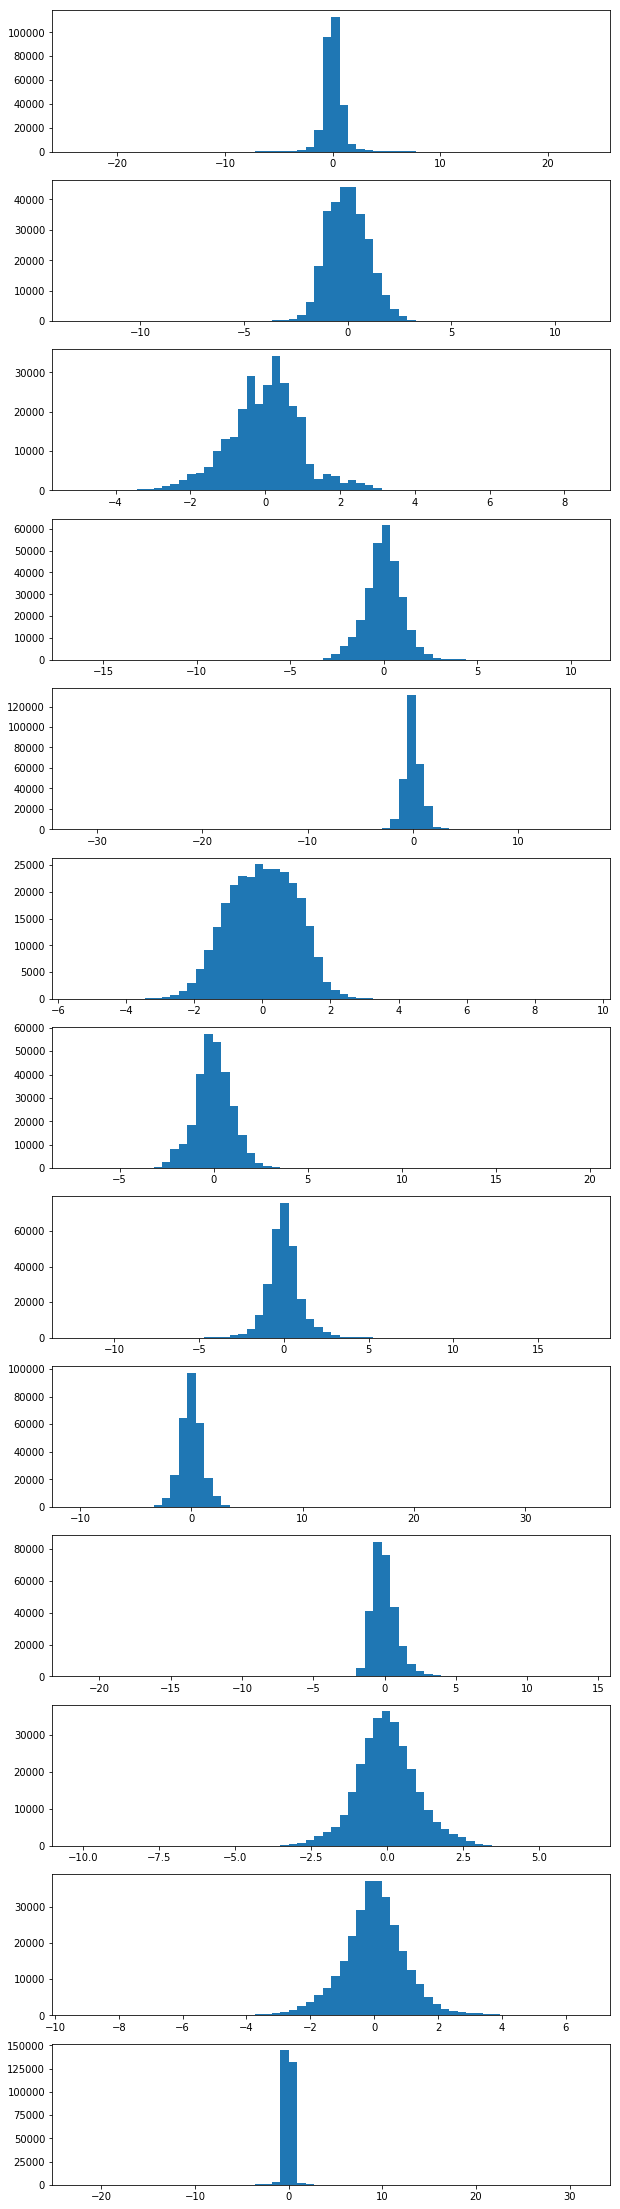

In [30]:
# lets draw the histogram to check visualization 
columns = ['V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18',
       'V19','V27']

grid = gridspec.GridSpec(13,1)
plt.figure(figsize=(10,40))

for n, col in enumerate(columns):
    ax = plt.subplot(grid[n])
    plt.hist(df[col], bins=60)

- All feature seem to normal distribution

In [31]:
# lets check the data after power transform
df.head()

,time_hour,time_min,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19,V27,Amount,Class
0,0,0,-0.131503,2.176074,0.983588,0.380443,0.127074,-0.513088,-0.774671,-0.404755,-0.600774,0.215544,0.009991,0.503467,0.133558,5.008105,0
1,0,0,0.093067,-0.035062,0.387928,-0.184488,-0.115195,1.523934,1.296242,-0.232720,0.491958,-0.175639,-0.238612,-0.169496,-0.008983,0.989913,0
2,0,0,-0.871858,1.381297,0.341811,-1.453859,0.234324,0.640742,-0.104954,-0.255865,-2.809663,1.383126,-0.165261,-2.838493,-0.055353,5.936641,0
3,0,0,-0.202760,1.401049,-0.581136,-1.319689,-0.008922,-0.179270,0.026987,-0.381222,-1.194700,-0.829186,2.435570,-1.528799,0.062723,4.816249,0
4,0,0,0.530197,1.160592,0.357540,0.769520,0.718432,-0.798770,0.496185,-1.168769,-0.580731,-0.319406,-0.066425,0.986458,0.219422,4.248367,0


# Train-Test Split

In [32]:
# lets divide the data to train and test 

from sklearn.model_selection import train_test_split


x = df.drop(["Class"], axis=1).values
y = df["Class"].values


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [33]:
# lets check the data target train and test data and sum

print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
372
120


## Model Building

### Building  different models on the im-balanced dataset and will see the result. Then will build the model on balanced dataset with Hyper tuning.

- Logistics regression
- Decision Tree
- Random Forest
- Xboost

#### We will build all the model and will comapre at last which one is performing good as per evaluation matrix.

In [34]:
# lets define the funtion for evaluation as wre are going to use this in entire model buidling 

from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

def evaluation_parameter(y_test,y_pred):
    print("Accuracy_score: ",accuracy_score(y_test, y_pred))
    print("\nroc_auc_score : ",roc_auc_score(y_test, y_pred))
    print("\nconfusion_matrix: \n ",confusion_matrix(y_test, y_pred))
    print("\nf1_score: ",f1_score(y_test, y_pred))
    print("\nprecision_score: ",precision_score(y_test, y_pred))
    print("\nrecall_score: ",recall_score(y_test, y_pred))


In [35]:
# lets import the required liberary for model buidling 

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [36]:
# lets create the pipe line 
pipeline_lr = Pipeline([("lr_classifier", LogisticRegression())])
pipeline_dt = Pipeline([("dt_classifier", DecisionTreeClassifier())])
pipeline_rf = Pipeline([("rf_classifier", RandomForestClassifier())])
pipeline_xb = Pipeline([("xb_classifier", XGBClassifier())])

In [37]:
## Lets make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf,pipeline_xb]

In [38]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3:'XGBClassifier'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [39]:
# lets predict the target from test and evalaute the model
for pipe in pipelines:
    y_pred_train = pipe.predict(X_train)
    print(pipe)
    evaluation_parameter(y_train, y_pred_train)
    print()

Pipeline(steps=[('lr_classifier', LogisticRegression())])
Accuracy_score:  0.999227546171672

roc_auc_score :  0.8184780415123666

confusion_matrix: 
  [[213203     30]
 [   135    237]]

f1_score:  0.7417840375586854

precision_score:  0.8876404494382022

recall_score:  0.6370967741935484

Pipeline(steps=[('dt_classifier', DecisionTreeClassifier())])
Accuracy_score:  1.0

roc_auc_score :  1.0

confusion_matrix: 
  [[213233      0]
 [     0    372]]

f1_score:  1.0

precision_score:  1.0

recall_score:  1.0

Pipeline(steps=[('rf_classifier', RandomForestClassifier())])
Accuracy_score:  1.0

roc_auc_score :  1.0

confusion_matrix: 
  [[213233      0]
 [     0    372]]

f1_score:  1.0

precision_score:  1.0

recall_score:  1.0

Pipeline(steps=[('xb_classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                      

In [40]:
# lets predict the target from test and evalaute the model
for pipe in pipelines:
    y_pred = pipe.predict(X_test)
    print(pipe)
    evaluation_parameter(y_test, y_pred)
    print()

Pipeline(steps=[('lr_classifier', LogisticRegression())])
Accuracy_score:  0.9992696834358585

roc_auc_score :  0.8207700261669622

confusion_matrix: 
  [[71073     9]
 [   43    77]]

f1_score:  0.7475728155339806

precision_score:  0.8953488372093024

recall_score:  0.6416666666666667

Pipeline(steps=[('dt_classifier', DecisionTreeClassifier())])
Accuracy_score:  0.9991713715906857

roc_auc_score :  0.866476745167553

confusion_matrix: 
  [[71055    27]
 [   32    88]]

f1_score:  0.7489361702127659

precision_score:  0.7652173913043478

recall_score:  0.7333333333333333

Pipeline(steps=[('rf_classifier', RandomForestClassifier())])
Accuracy_score:  0.9995646189713772

roc_auc_score :  0.8916314960186826

confusion_matrix: 
  [[71077     5]
 [   26    94]]

f1_score:  0.8584474885844748

precision_score:  0.9494949494949495

recall_score:  0.7833333333333333

Pipeline(steps=[('xb_classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                           

# Lets do the Hyperarameter tuning with all model and see the result

In [41]:
# Perform Hyperparameter Tuning Using RandomizedSearchCV and StratifiedKFold

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 10)

# Logistic Regression

In [42]:
# lets do the hyper parameter tuning for LogisticRegression
linear_lr = LogisticRegression()

parameter = {
            'C': [0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 10],
            'penalty': ['l1', 'l2'],
            'random_state' : [100],
            'solver': ['newton-cg','saga','sag','liblinear'],
            'max_iter': [100,200,250,300],
            'multi_class': ["auto", 'ovr', "multinomial"]
            
        }
    
grip_search = RandomizedSearchCV(estimator=linear_lr, cv=folds,param_distributions=parameter,verbose=1,n_jobs=-1,scoring='roc_auc')
grip_search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   57.4s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=True),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 10],
                                        'max_iter': [100, 200, 250, 300],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2'],
                                        'random_state': [100],
                                        'solver': ['newton-cg', 'saga', 'sag',
                                                   'liblinear']},
                   scoring='roc_auc', verbose=1)

In [43]:
# let do the evaluation on train data 
y_pred_train_lr = grip_search.predict(X_train)

# lets call the function for to see the result
evaluation_parameter(y_train, y_pred_train_lr)

Accuracy_score:  0.999227546171672

roc_auc_score :  0.8184780415123666

confusion_matrix: 
  [[213203     30]
 [   135    237]]

f1_score:  0.7417840375586854

precision_score:  0.8876404494382022

recall_score:  0.6370967741935484


In [44]:
# let do the evaluation on test data 
y_pred_test_lr = grip_search.predict(X_test)

# lets call the function for to see the result
evaluation_parameter(y_test, y_pred_test_lr)

Accuracy_score:  0.9992556388865481

roc_auc_score :  0.8166033595002955

confusion_matrix: 
  [[71073     9]
 [   44    76]]

f1_score:  0.7414634146341464

precision_score:  0.8941176470588236

recall_score:  0.6333333333333333


# Random Forest

In [45]:
# Random forest 
rf = RandomForestClassifier()

# StratifiedKFold folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 10)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

parameter = {  'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'criterion': ['gini', 'entropy'],
               'min_samples_leaf': min_samples_leaf,
            }

model_rf = RandomizedSearchCV(estimator=rf, cv=folds,param_distributions=parameter,verbose=1,n_jobs=-1,scoring='roc_auc')
model_rf.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   scoring='roc_auc', verbose=1)

In [46]:
# let do the evaluation on train data 
y_pred_train_rf = model_rf.predict(X_train)

# lets call the function for to see the result
evaluation_parameter(y_train, y_pred_train_rf )

Accuracy_score:  0.9997518784672643

roc_auc_score :  0.9368138878723657

confusion_matrix: 
  [[213227      6]
 [    47    325]]

f1_score:  0.9246088193456615

precision_score:  0.9818731117824774

recall_score:  0.8736559139784946


In [47]:
# let do the evaluation on test data 
y_pred_test_rf= model_rf.predict(X_test)

# lets call the function to see the result
evaluation_parameter(y_test, y_pred_test_rf)

Accuracy_score:  0.9995505744220669

roc_auc_score :  0.8916244618890858

confusion_matrix: 
  [[71076     6]
 [   26    94]]

f1_score:  0.8545454545454546

precision_score:  0.94

recall_score:  0.7833333333333333


# Decision Tree 

In [48]:
# Decision Tree 

dt = DecisionTreeClassifier()

# StratifiedKFold

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 10)


# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]


parameter = {  
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               "min_samples_leaf" : min_samples_leaf,
               'criterion': ['gini', 'entropy'],
               'splitter' : ["best", "random"]
            }

model_dt = RandomizedSearchCV(estimator=dt, cv=folds,param_distributions=parameter,verbose=1,n_jobs=-1,scoring='roc_auc')
model_dt.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.8s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   scoring='roc_auc', verbose=1)

In [49]:
# let do the evaluation on train data 
y_pred_train_dt = model_dt.predict(X_train)

# lets call the function for to see the result
evaluation_parameter(y_train, y_pred_train_dt)

Accuracy_score:  0.9995880246248917

roc_auc_score :  0.8964795829631365

confusion_matrix: 
  [[213222     11]
 [    77    295]]

f1_score:  0.8702064896755162

precision_score:  0.9640522875816994

recall_score:  0.793010752688172


In [50]:
# let do the evaluation on test data 
y_pred_test_dt= model_dt.predict(X_test)

# lets call the function to see the result
evaluation_parameter(y_test, y_pred_test_dt)

Accuracy_score:  0.9994241734782731

roc_auc_score :  0.8749226245744351

confusion_matrix: 
  [[71071    11]
 [   30    90]]

f1_score:  0.8144796380090499

precision_score:  0.8910891089108911

recall_score:  0.75


# XGB Classifier


In [51]:
# XGBClassifier

xb = XGBClassifier()

#StratifiedKFold

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 10)


# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]


parameter = {  
               'max_depth':range(3,10,2),
               'min_child_weight':range(1,6,2),
               'gamma':[i/10.0 for i in range(0,5)],
                'subsample':[i/10.0 for i in range(6,10)],
                'colsample_bytree':[i/10.0 for i in range(6,10)],
                'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
                 "learning_rate": [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3], # default 0.1
                "max_depth": max_depth, # default 3
                'n_estimators': n_estimators # default 100
                
            }


model_xb = RandomizedSearchCV(estimator=xb, cv=folds,param_distributions=parameter,verbose=1,n_jobs=-1,scoring='roc_auc')
model_xb.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None,...
                                           verbosity=None),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                   

In [52]:
# let do the evaluation on train data 
y_pred_train_xb = model_xb.predict(X_train)

# lets call the function to see the result
evaluation_parameter(y_train, y_pred_train_xb)

Accuracy_score:  0.9997144261604363

roc_auc_score :  0.9233777173629392

confusion_matrix: 
  [[213229      4]
 [    57    315]]

f1_score:  0.9117221418234444

precision_score:  0.987460815047022

recall_score:  0.8467741935483871


In [53]:
# let do the evaluation on test data 
y_pred_train_xb= model_xb.predict(X_test)

# lets call the function to see the result
evaluation_parameter(y_test, y_pred_train_xb)

Accuracy_score:  0.9995365298727564

roc_auc_score :  0.891617427759489

confusion_matrix: 
  [[71075     7]
 [   26    94]]

f1_score:  0.8506787330316742

precision_score:  0.9306930693069307

recall_score:  0.7833333333333333


# Model building after balancing the Classe using below technique: 

- Random Oversampling
- SMOTE
- ADASYN

In [54]:
# lets import the liberary
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# Lets fit the train data for RandomOverSampler, SMOTE, ADASYN

X_train_ran, y_train_ran = RandomOverSampler(random_state=10).fit_resample(X_train, y_train)
X_train_smt, y_train_smt = SMOTE().fit_resample(X_train, y_train)
X_train_adsyn, y_train_adsyn = ADASYN().fit_resample(X_train, y_train)

In [55]:
# Shape of the y_train 
y_train_ran.shape

(426466,)

In [56]:
# shape f X train shape
X_train_ran.shape

(426466, 16)

# Lets do the model building without Hyper parameter tuning first


## Random Oversampling Technique

In [57]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3:'XGBClassifier'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train_ran, y_train_ran)

In [58]:
# lets predict the target from train and evalaute the model
for pipe in pipelines:
    y_pred_train = pipe.predict(X_train_ran)
    print(pipe)
    evaluation_parameter(y_train_ran, y_pred_train)
    print()

Pipeline(steps=[('lr_classifier', LogisticRegression())])
Accuracy_score:  0.9391698283098769

roc_auc_score :  0.9391698283098769

confusion_matrix: 
  [[208039   5194]
 [ 20748 192485]]

f1_score:  0.9368672611167354

precision_score:  0.9737250795481563

recall_score:  0.9026979876473153

Pipeline(steps=[('dt_classifier', DecisionTreeClassifier())])
Accuracy_score:  1.0

roc_auc_score :  1.0

confusion_matrix: 
  [[213233      0]
 [     0 213233]]

f1_score:  1.0

precision_score:  1.0

recall_score:  1.0

Pipeline(steps=[('rf_classifier', RandomForestClassifier())])
Accuracy_score:  1.0

roc_auc_score :  1.0

confusion_matrix: 
  [[213233      0]
 [     0 213233]]

f1_score:  1.0

precision_score:  1.0

recall_score:  1.0

Pipeline(steps=[('xb_classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                     

In [59]:
# lets predict the target from test and evalaute the model
for pipe in pipelines:
    y_pred = pipe.predict(X_test)
    print(pipe)
    evaluation_parameter(y_test, y_pred)
    print()

Pipeline(steps=[('lr_classifier', LogisticRegression())])
Accuracy_score:  0.9762225780174714

roc_auc_score :  0.934015995610703

confusion_matrix: 
  [[69402  1680]
 [   13   107]]

f1_score:  0.11221814368117462

precision_score:  0.05987688864017907

recall_score:  0.8916666666666667

Pipeline(steps=[('dt_classifier', DecisionTreeClassifier())])
Accuracy_score:  0.9991573270413753

roc_auc_score :  0.8373522832784672

confusion_matrix: 
  [[71061    21]
 [   39    81]]

f1_score:  0.7297297297297296

precision_score:  0.7941176470588235

recall_score:  0.675

Pipeline(steps=[('rf_classifier', RandomForestClassifier())])
Accuracy_score:  0.999592708069998

roc_auc_score :  0.9041244618890858

confusion_matrix: 
  [[71076     6]
 [   23    97]]

f1_score:  0.8699551569506726

precision_score:  0.941747572815534

recall_score:  0.8083333333333333

Pipeline(steps=[('xb_classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample

# SMOTE Technique

In [60]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3:'XGBClassifier'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train_smt, y_train_smt)

In [61]:
# lets predict the target from train and evalaute the model
for pipe in pipelines:
    y_pred_train = pipe.predict(X_train_smt)
    print(pipe)
    evaluation_parameter(y_train_smt, y_pred_train)
    print()

Pipeline(steps=[('lr_classifier', LogisticRegression())])
Accuracy_score:  0.9473697785989973

roc_auc_score :  0.9473697785989973

confusion_matrix: 
  [[207966   5267]
 [ 17178 196055]]

f1_score:  0.9458576063489765

precision_score:  0.973837931274277

recall_score:  0.91944023673634

Pipeline(steps=[('dt_classifier', DecisionTreeClassifier())])
Accuracy_score:  1.0

roc_auc_score :  1.0

confusion_matrix: 
  [[213233      0]
 [     0 213233]]

f1_score:  1.0

precision_score:  1.0

recall_score:  1.0

Pipeline(steps=[('rf_classifier', RandomForestClassifier())])
Accuracy_score:  1.0

roc_auc_score :  1.0

confusion_matrix: 
  [[213233      0]
 [     0 213233]]

f1_score:  1.0

precision_score:  1.0

recall_score:  1.0

Pipeline(steps=[('xb_classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                        

In [62]:
# lets predict the target from test and evalaute the model
for pipe in pipelines:
    y_pred = pipe.predict(X_test)
    print(pipe)
    evaluation_parameter(y_test, y_pred)
    print()

Pipeline(steps=[('lr_classifier', LogisticRegression())])
Accuracy_score:  0.9760399988764361

roc_auc_score :  0.9339245519259447

confusion_matrix: 
  [[69389  1693]
 [   13   107]]

f1_score:  0.11145833333333334

precision_score:  0.059444444444444446

recall_score:  0.8916666666666667

Pipeline(steps=[('dt_classifier', DecisionTreeClassifier())])
Accuracy_score:  0.9970927782927446

roc_auc_score :  0.9111916518949945

confusion_matrix: 
  [[70896   186]
 [   21    99]]

f1_score:  0.48888888888888893

precision_score:  0.3473684210526316

recall_score:  0.825

Pipeline(steps=[('rf_classifier', RandomForestClassifier())])
Accuracy_score:  0.9995365298727564

roc_auc_score :  0.9248944880560481

confusion_matrix: 
  [[71067    15]
 [   18   102]]

f1_score:  0.8607594936708861

precision_score:  0.8717948717948718

recall_score:  0.85

Pipeline(steps=[('xb_classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=

# ADASYN Technique

In [63]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3:'XGBClassifier'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train_adsyn, y_train_adsyn)

In [64]:
# lets predict the target from train and evalaute the model
for pipe in pipelines:
    y_pred_train = pipe.predict(X_train_adsyn)
    print(pipe)
    evaluation_parameter(y_train_adsyn, y_pred_train)
    print()

Pipeline(steps=[('lr_classifier', LogisticRegression())])
Accuracy_score:  0.8840896408457639

roc_auc_score :  0.8840928971673823

confusion_matrix: 
  [[196744  16489]
 [ 32947 180322]]

f1_score:  0.8794479126024191

precision_score:  0.9162191137690474

recall_score:  0.845514350421299

Pipeline(steps=[('dt_classifier', DecisionTreeClassifier())])
Accuracy_score:  1.0

roc_auc_score :  1.0

confusion_matrix: 
  [[213233      0]
 [     0 213269]]

f1_score:  1.0

precision_score:  1.0

recall_score:  1.0

Pipeline(steps=[('rf_classifier', RandomForestClassifier())])
Accuracy_score:  1.0

roc_auc_score :  1.0

confusion_matrix: 
  [[213233      0]
 [     0 213269]]

f1_score:  1.0

precision_score:  1.0

recall_score:  1.0

Pipeline(steps=[('xb_classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                      

In [65]:
# lets predict the target from test and evalaute the model
for pipe in pipelines:
    y_pred = pipe.predict(X_test)
    print(pipe)
    evaluation_parameter(y_test, y_pred)
    print()

Pipeline(steps=[('lr_classifier', LogisticRegression())])
Accuracy_score:  0.9237942754417011

roc_auc_score :  0.9327153850482541

confusion_matrix: 
  [[65663  5419]
 [    7   113]]

f1_score:  0.03998584571832979

precision_score:  0.020426608821402747

recall_score:  0.9416666666666667

Pipeline(steps=[('dt_classifier', DecisionTreeClassifier())])
Accuracy_score:  0.9972753574337799

roc_auc_score :  0.9071234630426831

confusion_matrix: 
  [[70910   172]
 [   22    98]]

f1_score:  0.5025641025641026

precision_score:  0.362962962962963

recall_score:  0.8166666666666667

Pipeline(steps=[('rf_classifier', RandomForestClassifier())])
Accuracy_score:  0.9995365298727564

roc_auc_score :  0.9248944880560481

confusion_matrix: 
  [[71067    15]
 [   18   102]]

f1_score:  0.8607594936708861

precision_score:  0.8717948717948718

recall_score:  0.85

Pipeline(steps=[('xb_classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsamp

# Lets build the model with hyper parameter tuning with balanced classes

# Random Oversampling Technique

# Logistic Regression

In [66]:
# LogisticRegression
linear_lr = LogisticRegression()

# StratifiedKFold
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 10)

parameter = {
            'C': [0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 10],
            'penalty': ['l1', 'l2'],
            'random_state' : [100],
            'solver': ['newton-cg','saga','sag','liblinear'],
            'max_iter': [100,200,250,300],
            'multi_class': ["auto", 'ovr', "multinomial"]
            
        }
    
model_lr_ran = RandomizedSearchCV(estimator=linear_lr, cv=folds,param_distributions=parameter,verbose=1,n_jobs=-1,scoring='roc_auc')
model_lr_ran.fit(X_train_ran,y_train_ran)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   27.7s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=True),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 10],
                                        'max_iter': [100, 200, 250, 300],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2'],
                                        'random_state': [100],
                                        'solver': ['newton-cg', 'saga', 'sag',
                                                   'liblinear']},
                   scoring='roc_auc', verbose=1)

In [67]:
# let do the evaluation on train data 
y_pred_train_lr_ran = model_lr_ran.predict(X_train_ran)

# lets call the function for to see the result
evaluation_parameter(y_train_ran, y_pred_train_lr_ran)

Accuracy_score:  0.9391487246345547

roc_auc_score :  0.9391487246345547

confusion_matrix: 
  [[208030   5203]
 [ 20748 192485]]

f1_score:  0.9368467418311549

precision_score:  0.9736807494638016

recall_score:  0.9026979876473153


In [68]:
# let do the evaluation on test data 
y_pred_test_lr_ran = model_lr_ran.predict(X_test)

# lets call the function for to see the result
evaluation_parameter(y_test, y_pred_test_lr_ran)

Accuracy_score:  0.9761523552709194

roc_auc_score :  0.9339808249627191

confusion_matrix: 
  [[69397  1685]
 [   13   107]]

f1_score:  0.11192468619246863

precision_score:  0.05970982142857143

recall_score:  0.8916666666666667


# Decision Tree 

In [69]:
# Decision Tree 

dt = DecisionTreeClassifier()

# StratifiedKFold

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 10)


# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]


parameter = {  
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               "min_samples_leaf" : min_samples_leaf,
               'criterion': ['gini', 'entropy'],
               'splitter' : ["best", "random"]
            }

model_dt_ran = RandomizedSearchCV(estimator=dt, cv=folds,param_distributions=parameter,verbose=1,n_jobs=-1,scoring='roc_auc')
model_dt_ran.fit(X_train_ran,y_train_ran)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.1s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 12, 23, 34, 45],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   scoring='roc_auc', verbose=1)

In [70]:
# let do the evaluation on train data 
y_pred_train_dt_ran = model_dt_ran.predict(X_train_ran)

# lets call the function for to see the result
evaluation_parameter(y_train_ran, y_pred_train_dt_ran)

Accuracy_score:  0.9999319992684059

roc_auc_score :  0.9999319992684059

confusion_matrix: 
  [[213204     29]
 [     0 213233]]

f1_score:  0.999932003892191

precision_score:  0.9998640170306946

recall_score:  1.0


In [71]:
# let do the evaluation on test data 
y_pred_test_dt_ran= model_dt_ran.predict(X_test)

# lets call the function for to see the result
evaluation_parameter(y_test, y_pred_test_dt_ran)

Accuracy_score:  0.9991854161399961

roc_auc_score :  0.8997608395937087

confusion_matrix: 
  [[71048    34]
 [   24    96]]

f1_score:  0.768

precision_score:  0.7384615384615385

recall_score:  0.8


# Random forest

In [72]:
# Random forest

rf = RandomForestClassifier()

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 10)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 20)]
# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


parameter = {  'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'criterion': ['gini', 'entropy'],
               'min_samples_leaf': min_samples_leaf,

               
            }

model_rf_ran = RandomizedSearchCV(estimator=rf, cv=folds,param_distributions=parameter,verbose=1,n_jobs=-1,scoring='roc_auc')
model_rf_ran .fit(X_train_ran,y_train_ran)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 10.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 12, 23, 34, 45],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 29, 38, 48, 57, 67,
                                                         76, 86, 95, 105, 114,
                                                         124, 133, 143, 152,
                                                         162, 171, 181, 190,
                                                         200]},
                   scoring='roc_auc', verbose=

In [73]:
# let do the evaluation on train data 
y_pred_train_lr = model_rf_ran.predict(X_train_ran)

# lets call the function for to see the result
evaluation_parameter(y_train_ran, y_pred_train_lr)

Accuracy_score:  1.0

roc_auc_score :  1.0

confusion_matrix: 
  [[213233      0]
 [     0 213233]]

f1_score:  1.0

precision_score:  1.0

recall_score:  1.0


In [74]:
# let do the evaluation on train data 
y_pred_test_rf_ran = model_rf_ran.predict(X_test)

# lets call the function for to see the result
evaluation_parameter(y_test, y_pred_test_rf_ran)

Accuracy_score:  0.999592708069998

roc_auc_score :  0.8999648293520159

confusion_matrix: 
  [[71077     5]
 [   24    96]]

f1_score:  0.8687782805429864

precision_score:  0.9504950495049505

recall_score:  0.8


# XGBClassifier

In [75]:
# XGBClassifier

xb = XGBClassifier()

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 10)


# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]


parameter = {  
               'max_depth':range(3,10,2),
               'min_child_weight':range(1,6,2),
               'gamma':[i/10.0 for i in range(0,5)],
                'subsample':[i/10.0 for i in range(6,10)],
                'colsample_bytree':[i/10.0 for i in range(6,10)],
                'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
                 "learning_rate": [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3], # default 0.1
                'n_estimators': n_estimators, # default 100
                
            }


model_xb_ran = RandomizedSearchCV(estimator=xb, cv=folds,param_distributions=parameter,verbose=1,n_jobs=-1,scoring='roc_auc')
model_xb_ran.fit(X_train_ran,y_train_ran)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 13.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None,...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning

In [76]:
# let do the evaluation on train data 
y_pred_train_ran = model_xb_ran.predict(X_train_ran)

# lets call the function for to see the result
evaluation_parameter(y_train_ran, y_pred_train_ran)

Accuracy_score:  1.0

roc_auc_score :  1.0

confusion_matrix: 
  [[213233      0]
 [     0 213233]]

f1_score:  1.0

precision_score:  1.0

recall_score:  1.0


In [77]:
# let do the evaluation on test data 
y_pred_test_xb_ran = model_xb_ran.predict(X_test)

# lets call the function for to see the result
evaluation_parameter(y_test, y_pred_test_xb_ran)

Accuracy_score:  0.9996348417179293

roc_auc_score :  0.9207840944261557

confusion_matrix: 
  [[71075     7]
 [   19   101]]

f1_score:  0.8859649122807017

precision_score:  0.9351851851851852

recall_score:  0.8416666666666667


# SMOTE Technique

# Logistic Regression

In [78]:
linear_lr = LogisticRegression()

parameter = {
            'C': [0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 10],
            'penalty': ['l1', 'l2'],
            'random_state' : [100],
            'solver': ['newton-cg','saga','sag','liblinear'],
            'max_iter': [100,200,250,300],
            'multi_class': ["auto", 'ovr', "multinomial"]
        }
    
model_lr_smt = RandomizedSearchCV(estimator=linear_lr, cv=folds,param_distributions=parameter,verbose=1,n_jobs=-1,scoring='roc_auc')
model_lr_smt.fit(X_train_smt,y_train_smt)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=True),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 10],
                                        'max_iter': [100, 200, 250, 300],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2'],
                                        'random_state': [100],
                                        'solver': ['newton-cg', 'saga', 'sag',
                                                   'liblinear']},
                   scoring='roc_auc', verbose=1)

In [79]:
# let do the evaluation on train data 
y_pred_train_smt = model_lr_smt.predict(X_train_smt)

# lets call the function for to see the result
evaluation_parameter(y_train_smt, y_pred_train_smt)

Accuracy_score:  0.9472431565470636

roc_auc_score :  0.9472431565470636

confusion_matrix: 
  [[207970   5263]
 [ 17236 195997]]

f1_score:  0.9457192280689902

precision_score:  0.9738497465964424

recall_score:  0.9191682338099637


In [80]:
# lets call the function for to see the result
y_pred_test_smt = model_lr_smt.predict(X_test)

# lets call the function for to see the result
evaluation_parameter(y_test, y_pred_test_smt)

Accuracy_score:  0.975969776129884

roc_auc_score :  0.9338893812779606

confusion_matrix: 
  [[69384  1698]
 [   13   107]]

f1_score:  0.11116883116883118

precision_score:  0.0592797783933518

recall_score:  0.8916666666666667


# Decision Tree 

In [81]:
# Decision Tree 

dt = DecisionTreeClassifier()

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 10)


# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]


parameter = {  
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               "min_samples_leaf" : min_samples_leaf,
               'criterion': ['gini', 'entropy'],
               'splitter' : ["best", "random"]
            }

model_dt_smt = RandomizedSearchCV(estimator=dt, cv=folds,param_distributions=parameter,verbose=1,n_jobs=-1,scoring='roc_auc')
model_dt_smt.fit(X_train_smt,y_train_smt)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.4s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 12, 23, 34, 45],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   scoring='roc_auc', verbose=1)

In [82]:
# let do the evaluation on train data 
y_pred_train_smt = model_dt_smt.predict(X_train_smt)

# lets call the function for to see the result
evaluation_parameter(y_train_smt, y_pred_train_smt)

Accuracy_score:  0.9991793015152439

roc_auc_score :  0.9991793015152438

confusion_matrix: 
  [[213118    115]
 [   235 212998]]

f1_score:  0.9991790705201877

precision_score:  0.9994603801738984

recall_score:  0.9988979191776132


In [83]:
# lets call the function for to see the result
y_pred_test_smt = model_dt_smt.predict(X_test)

# lets call the function for to see the result
evaluation_parameter(y_test, y_pred_test_smt)

Accuracy_score:  0.9972753574337799

roc_auc_score :  0.9279216257280325

confusion_matrix: 
  [[70905   177]
 [   17   103]]

f1_score:  0.515

precision_score:  0.3678571428571429

recall_score:  0.8583333333333333


# Random forest

In [84]:
# Random forest

rf = RandomForestClassifier()

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 10)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 20)]
# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


parameter = {  'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'criterion': ['gini', 'entropy'],
               'min_samples_leaf': min_samples_leaf,

               
            }

model_rf_smt = RandomizedSearchCV(estimator=rf, cv=folds,param_distributions=parameter,verbose=1,n_jobs=-1,scoring='roc_auc')
model_rf_smt.fit(X_train_smt,y_train_smt)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 19.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 12, 23, 34, 45],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 29, 38, 48, 57, 67,
                                                         76, 86, 95, 105, 114,
                                                         124, 133, 143, 152,
                                                         162, 171, 181, 190,
                                                         200]},
                   scoring='roc_auc', verbose=

In [85]:
# let do the evaluation on train data 
y_pred_train_smt_rf = model_rf_smt.predict(X_train_smt)

# lets call the function for to see the result
evaluation_parameter(y_train_smt, y_pred_train_smt_rf)

Accuracy_score:  0.999971861766237

roc_auc_score :  0.9999718617662369

confusion_matrix: 
  [[213221     12]
 [     0 213233]]

f1_score:  0.9999718625579749

precision_score:  0.9999437266993364

recall_score:  1.0


In [86]:
# lets call the function for to see the result
y_pred_test_smt_rf = model_rf_smt.predict(X_test)

# lets call the function for to see the result
evaluation_parameter(y_test, y_pred_test_smt_rf)

Accuracy_score:  0.9995084407741356

roc_auc_score :  0.9290400523339242

confusion_matrix: 
  [[71064    18]
 [   17   103]]

f1_score:  0.8547717842323651

precision_score:  0.8512396694214877

recall_score:  0.8583333333333333


# XGBClassifier

In [87]:
# XGBClassifier

xb = XGBClassifier()

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 10)


# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]


parameter = {  
               'max_depth':range(3,10,2),
               'min_child_weight':range(1,6,2),
               'gamma':[i/10.0 for i in range(0,5)],
                'subsample':[i/10.0 for i in range(6,10)],
                'colsample_bytree':[i/10.0 for i in range(6,10)],
                'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
                 "learning_rate": [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3], # default 0.1
                'n_estimators': n_estimators, # default 100
                
            }


model_xb_smt = RandomizedSearchCV(estimator=xb, cv=folds,param_distributions=parameter,verbose=1,n_jobs=-1,scoring='roc_auc')
model_xb_smt.fit(X_train_smt,y_train_smt)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None,...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning

In [88]:
# let do the evaluation on train data 
y_pred_train_smt_xb = model_xb_smt.predict(X_train_smt)

# lets call the function for to see the result
evaluation_parameter(y_train_smt, y_pred_train_smt_xb)

Accuracy_score:  0.9998921367705749

roc_auc_score :  0.999892136770575

confusion_matrix: 
  [[213190     43]
 [     3 213230]]

f1_score:  0.9998921468865619

precision_score:  0.9997983804794793

recall_score:  0.9999859308831185


In [89]:
# lets call the function for to see the result
y_pred_test_smt_xb = model_xb_smt.predict(X_test)

# lets call the function for to see the result
evaluation_parameter(y_test, y_pred_test_smt_xb)

Accuracy_score:  0.9992415943372377

roc_auc_score :  0.9330660364086548

confusion_matrix: 
  [[71044    38]
 [   16   104]]

f1_score:  0.7938931297709925

precision_score:  0.7323943661971831

recall_score:  0.8666666666666667


# ADASYN Technique

# Logistic Regression

In [90]:
linear_lr = LogisticRegression()

parameter = {
            'C': np.logspace(-4, 4, 20),
            'penalty': ['l1', 'l2'],
            'random_state' : [100],
            'solver': ['newton-cg','saga','sag','liblinear']
            
        }
    
model_lr_ads = RandomizedSearchCV(estimator=linear_lr, cv=folds,param_distributions=parameter,verbose=1,n_jobs=-1,scoring='roc_auc')
model_lr_ads.fit(X_train_adsyn, y_train_adsyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   26.1s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=True),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'random_state': [100],
                                        'solver': ['newton-cg', 'saga', 'sag',
                                                   'liblinear']},
                   scoring='roc_auc', verbose=1)

In [91]:
# let do the evaluation on train data 
y_pred_train_ads_lr = model_lr_ads.predict(X_train_adsyn)

# lets call the function for to see the result
evaluation_parameter(y_train_adsyn, y_pred_train_ads_lr)

Accuracy_score:  0.8841740484218128

roc_auc_score :  0.8841773122644847

confusion_matrix: 
  [[196781  16452]
 [ 32948 180321]]

f1_score:  0.8795245365108939

precision_score:  0.9163909682730862

recall_score:  0.8455096615072983


In [92]:
# lets call the function for to see the result
y_pred_test_ads_lr = model_lr_ads.predict(X_test)

# lets call the function for to see the result
evaluation_parameter(y_test, y_pred_test_smt_xb)

Accuracy_score:  0.9992415943372377

roc_auc_score :  0.9330660364086548

confusion_matrix: 
  [[71044    38]
 [   16   104]]

f1_score:  0.7938931297709925

precision_score:  0.7323943661971831

recall_score:  0.8666666666666667


# Decision Tree 

In [93]:
# Decision Tree 

dt = DecisionTreeClassifier()

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 10)


# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]


parameter = {  
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               "min_samples_leaf" : min_samples_leaf,
               'criterion': ['gini', 'entropy'],
               'splitter' : ["best", "random"]
            }

model_dt_ads = RandomizedSearchCV(estimator=dt, cv=folds,param_distributions=parameter,verbose=1,n_jobs=-1,scoring='roc_auc')
model_dt_ads.fit(X_train_adsyn, y_train_adsyn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.7s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 12, 23, 34, 45],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   scoring='roc_auc', verbose=1)

In [94]:
# let do the evaluation on train data 
y_pred_train_ads_dt = model_dt_ads.predict(X_train_adsyn)

# lets call the function for to see the result
evaluation_parameter(y_train_adsyn, y_pred_train_ads_dt)

Accuracy_score:  0.9968605071019596

roc_auc_score :  0.9968602986839028

confusion_matrix: 
  [[212037   1196]
 [   143 213126]]

f1_score:  0.9968685028450084

precision_score:  0.9944196116124336

recall_score:  0.9993294852979101


In [95]:
# lets call the function for to see the result
y_pred_test_ads_dt = model_dt_ads.predict(X_test)

# lets call the function for to see the result
evaluation_parameter(y_test, y_pred_test_ads_dt)

Accuracy_score:  0.9923738097244459

roc_auc_score :  0.9046685518133986

confusion_matrix: 
  [[70561   521]
 [   22    98]]

f1_score:  0.2652232746955345

precision_score:  0.1583198707592892

recall_score:  0.8166666666666667


# Random forest

In [96]:
# Random forest

rf = RandomForestClassifier()

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 10)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 20)]
# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


parameter = {  'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'criterion': ['gini', 'entropy'],
               'min_samples_leaf': min_samples_leaf,
            }

model_rf_ads = RandomizedSearchCV(estimator=rf, cv=folds,param_distributions=parameter,verbose=1,n_jobs=-1,scoring='roc_auc')
model_rf_ads.fit(X_train_adsyn, y_train_adsyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 32.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 12, 23, 34, 45],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 29, 38, 48, 57, 67,
                                                         76, 86, 95, 105, 114,
                                                         124, 133, 143, 152,
                                                         162, 171, 181, 190,
                                                         200]},
                   scoring='roc_auc', verbose=

In [97]:
# let do the evaluation on train data 
y_pred_train_ads_rf = model_rf_ads.predict(X_train_adsyn)

# lets call the function for to see the result
evaluation_parameter(y_train_adsyn, y_pred_train_ads_rf)

Accuracy_score:  0.999971864141317

roc_auc_score :  0.9999718617662369

confusion_matrix: 
  [[213221     12]
 [     0 213269]]

f1_score:  0.9999718673074669

precision_score:  0.999943736197786

recall_score:  1.0


In [98]:
# lets call the function for to see the result
y_pred_test_ads_rf = model_rf_ads.predict(X_test)

# lets call the function for to see the result
evaluation_parameter(y_test, y_pred_test_ads_rf)

Accuracy_score:  0.9995365298727564

roc_auc_score :  0.9248944880560481

confusion_matrix: 
  [[71067    15]
 [   18   102]]

f1_score:  0.8607594936708861

precision_score:  0.8717948717948718

recall_score:  0.85


# XGBClassifier

In [99]:
# XGBClassifier

xb = XGBClassifier()

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 10)


# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]


parameter = {  
               'max_depth':range(3,10,2),
               'min_child_weight':range(1,6,2),
               'gamma':[i/10.0 for i in range(0,5)],
                'subsample':[i/10.0 for i in range(6,10)],
                'colsample_bytree':[i/10.0 for i in range(6,10)],
                'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
                 "learning_rate": [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3], # default 0.1
                'n_estimators': n_estimators, # default 100
                
            }


model_xb_ads = RandomizedSearchCV(estimator=xb, cv=folds,param_distributions=parameter,verbose=1,n_jobs=-1,scoring='roc_auc')
model_xb_ads.fit(X_train_adsyn, y_train_adsyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 10.2min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None,...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning

In [100]:
# let do the evaluation on train data 
y_pred_train_ads_xb = model_xb_ads.predict(X_train_adsyn)

# lets call the function for to see the result
evaluation_parameter(y_train_adsyn, y_pred_train_ads_xb)

Accuracy_score:  0.9999812427608781

roc_auc_score :  0.9999812411774912

confusion_matrix: 
  [[213225      8]
 [     0 213269]]

f1_score:  0.9999812446957655

precision_score:  0.9999624900950407

recall_score:  1.0


In [101]:
# lets call the function for to see the result
y_pred_test_ads_xb = model_xb_ads.predict(X_test)

# lets call the function for to see the result
evaluation_parameter(y_test, y_pred_test_ads_xb)

Accuracy_score:  0.9995365298727564

roc_auc_score :  0.9207348555189782

confusion_matrix: 
  [[71068    14]
 [   19   101]]

f1_score:  0.8595744680851064

precision_score:  0.8782608695652174

recall_score:  0.8416666666666667


# Evaluation for all the above model

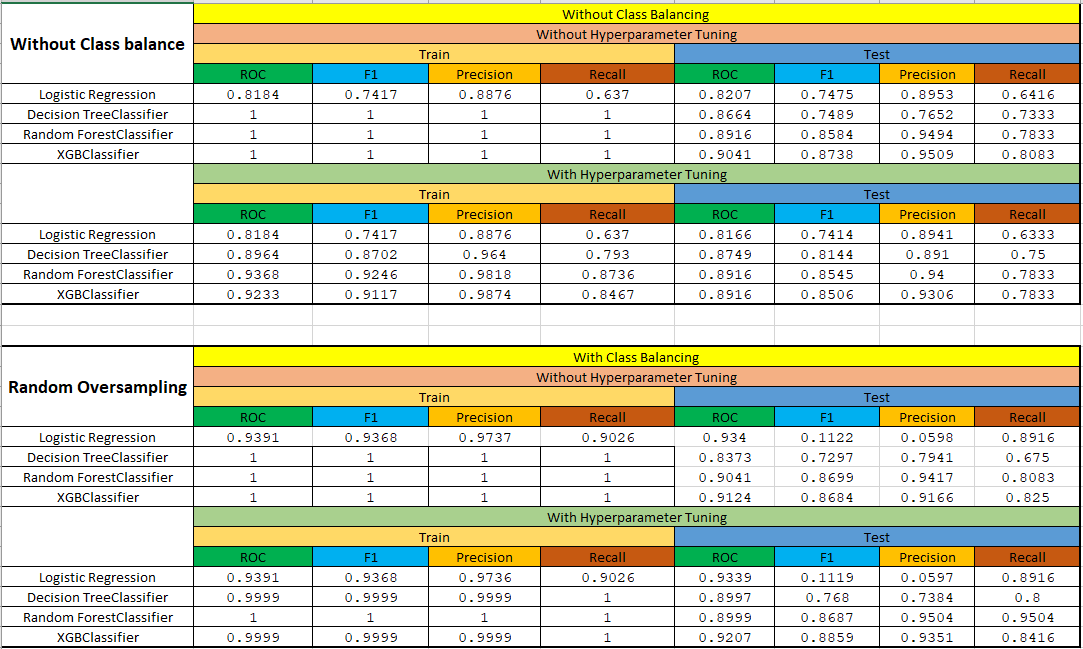

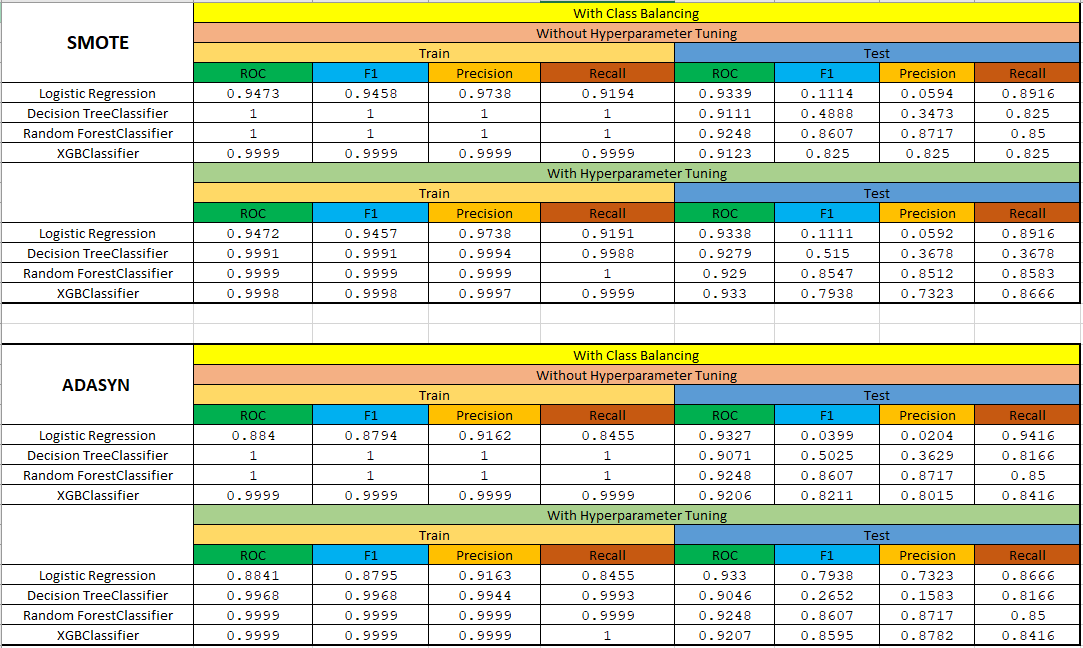

- In that Random Forest with Balancing the class with ADASYN given best result.

In [102]:
# lets initilaise the RandomForestClassifier with corect hyperameter 
clf = RandomForestClassifier(criterion='entropy', max_depth=45, max_features='log2', min_samples_split=5, n_estimators=76)

In [103]:
# lets fit the model
clf.fit(X_train_adsyn, y_train_adsyn)

RandomForestClassifier(criterion='entropy', max_depth=45, max_features='log2',
                       min_samples_split=5, n_estimators=76)

In [104]:
# let do the evaluation on train data 
y_pred_train_ads_rf = clf.predict(X_train_adsyn)

# lets call the function for to see the result
evaluation_parameter(y_train_adsyn, y_pred_train_ads_rf)

Accuracy_score:  1.0

roc_auc_score :  1.0

confusion_matrix: 
  [[213233      0]
 [     0 213269]]

f1_score:  1.0

precision_score:  1.0

recall_score:  1.0


In [105]:
# lets call the function for to see the result
y_pred_test_ads_rf = clf.predict(X_test)

# lets call the function for to see the result
evaluation_parameter(y_test, y_pred_test_ads_rf)

Accuracy_score:  0.9995646189713772

roc_auc_score :  0.9249085563152416

confusion_matrix: 
  [[71069    13]
 [   18   102]]

f1_score:  0.8680851063829788

precision_score:  0.8869565217391304

recall_score:  0.85


In [106]:
# confusion_matrix
confusion_mat_test_rf = confusion_matrix(y_test, y_pred_test_ads_rf)
confusion_mat_test_rf

array([[71069,    13],
       [   18,   102]])

In [107]:
# lets see the parameter 
TP = confusion_mat_test_rf[1,1] # true positive 
TN= confusion_mat_test_rf[0,0] # true negatives
FP = confusion_mat_test_rf[0,1] # false positives
FN = confusion_mat_test_rf[1,0] # false negatives

# Calculating Sensitivity
Sensitivity=round(TP/(TP+FN),2)*100
print("Sensitivity:",Sensitivity)

Sensitivity: 85.0


# Now, time to find the feature which is very important for deciding the fraud 

In [108]:
# lets see the feature_importances_
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
var_imp

[0.03867431279209673,
 0.04594091275352009,
 0.030659358424516604,
 0.055663950218434045,
 0.1999637897927094,
 0.0265672282115365,
 0.08256538215255968,
 0.046536819558394234,
 0.056490907553496596,
 0.1903050446554558,
 0.023744039454833422,
 0.08574459532199614,
 0.046253975157278554,
 0.01954284186158707,
 0.021811208413215374,
 0.029535633678369814]

In [109]:
# top variables index
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

Top var = 5
2nd Top var = 10
3rd Top var = 12


Feature: 0, Score: 0.03867
Feature: 1, Score: 0.04594
Feature: 2, Score: 0.03066
Feature: 3, Score: 0.05566
Feature: 4, Score: 0.19996
Feature: 5, Score: 0.02657
Feature: 6, Score: 0.08257
Feature: 7, Score: 0.04654
Feature: 8, Score: 0.05649
Feature: 9, Score: 0.19031
Feature: 10, Score: 0.02374
Feature: 11, Score: 0.08574
Feature: 12, Score: 0.04625
Feature: 13, Score: 0.01954
Feature: 14, Score: 0.02181
Feature: 15, Score: 0.02954


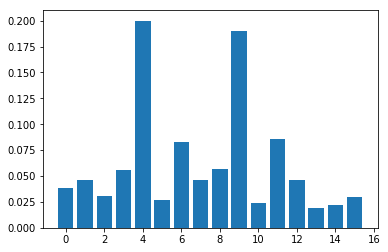

In [110]:
# lets see the score for that and draw the bat chart for the same
from matplotlib import pyplot
# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Conclusion

- The main important factor to measure the accuracy is Recall as we want to detect all kind of fraud transaction.

- According to the result we have got Random forest with Adasyn has good result and we can go with that.

# Thank you
- Rohit Keshari and Rahul Choudhary